## 用CNN圖形辨識

In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import time
import locale
import random
import keras
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact
from ipywidgets import interact_manual
from sklearn.linear_model import LinearRegression
from matplotlib.font_manager import FontProperties
from sklearn.model_selection import train_test_split

myfont = FontProperties(fname = r'c:\windows\fonts\simsun.ttc', size = 14)

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# 由 Keras 讀入 MNIST
from keras.datasets import mnist

#CNN
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam

# something userful
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
print("Training data : %d , with size %d x %d" %x_train.shape)
print("Testing  data : %d , with size %d x %d" %x_test.shape)

Training data : 60000 , with size 28 x 28
Testing  data : 10000 , with size 28 x 28


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

# CNN 要的是 (28, 28, 1)

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [8]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_train[1234].shape

(28, 28, 1)

In [19]:
x_test.shape

(10000, 28, 28, 1)

In [20]:
X = x_train[1234]

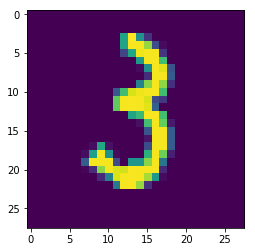

In [22]:
X = X.reshape(28, 28)
plt.imshow(X)

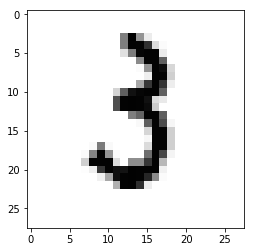

In [23]:
plt.imshow(X , cmap='Greys')

將資料先進行正規化處理，資料線性單位化至[0,1]

In [11]:
x_train_normalization = ( x_train - x_train.min() ) / ( x_train.max() - x_train.min() )#[NCTS]DavidChi
x_test_normalization = ( x_test - x_test.min() ) / ( x_test.max() - x_test.min() )

In [12]:
x_train_normalization.max(), x_train_normalization.min()

(1.0, 0.0)

In [13]:
x_test_normalization.max(), x_test_normalization.min()

(1.0, 0.0)

## 輸出格式處理，用 1-hot 方式處理。

In [14]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [25]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 建構神經網路

打開一個空白的神經網路。

In [5]:
model = Sequential()

In [ ]:
model.add(Conv2D(4,(5,5), padding='same',input_sh))
model.add(Activation('relu'))

In [12]:
y_train_eo = np.ones_like(y_train)
y_train_eo[y_train%2==0] = 0

y_test_eo = np.ones_like(y_test)
y_test_eo[y_test%2==0] = 0

([array([54077.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5923.]),
  array([53258.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  6742.]),
  array([54042.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5958.]),
  array([53869.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  6131.]),
  array([54158.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5842.]),
  array([54579.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5421.]),
  array([54082.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5918.]),
  array([53735.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  6265.]),
  array([54149.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5851.]),
  array([54051.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  5949.])],

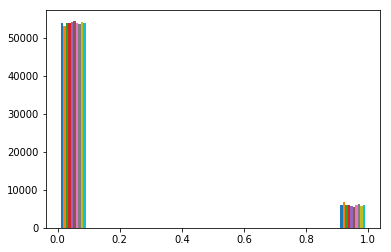

In [13]:
plt.hist(y_train_eo)

([array([9020.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          980.]),
  array([8865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1135.]),
  array([8968.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1032.]),
  array([8990.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1010.]),
  array([9018.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          982.]),
  array([9108.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          892.]),
  array([9042.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          958.]),
  array([8972.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1028.]),
  array([9026.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          974.]),
  array([8991.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1009.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Lists of Patches ob

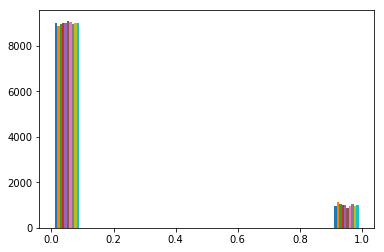

In [14]:
plt.hist(y_test_eo)

In [15]:
Layer_01 = [Dense(200, input_dim = 28 * 28), 
            Activation('sigmoid'),
            Dense(200),
            Activation('sigmoid')
           ]

Layer_02 = [Dense(100, input_dim = 28 * 28), 
            Activation('sigmoid'),
            Dense(100),
            Activation('sigmoid')
           ]

Layer_99 = [Dense(10), Activation('softmax')]

In [16]:
model_num = Sequential(Layer_01 + Layer_02 + Layer_99)
model_num.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
activation_2 (Activation)    (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
__________

In [20]:
model_num.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['acc'])
model_num_result = model_num.fit(x_train_normalization, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test_normalization, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0722 - acc: 0.9750 - val_loss: 0.0298 - val_acc: 0.9906
Epoch 2/20
60000/60000 [==============================] - 6s 101us/step - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0246 - val_acc: 0.9917
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0185 - acc: 0.9939 - val_loss: 0.0223 - val_acc: 0.9929
Epoch 4/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0159 - acc: 0.9949 - val_loss: 0.0208 - val_acc: 0.9933
Epoch 5/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0135 - acc: 0.9956 - val_loss: 0.0211 - val_acc: 0.9934
Epoch 6/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.0123 - acc: 0.9961 - val_loss: 0.0190 - val_acc: 0.9943
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0115 - acc: 0.9962 - val_loss: 0.0161 - val

In [21]:
score_num = model_num.evaluate(x_test_normalization, y_test)
print('model_num loss',score_num[0])
print('model_num 正確率',score_num[1] * 100 ,'%')

10000/10000 [==============================] - 1s 65us/step
model_num loss 0.017904152676579542
model_num 正確率 99.47999961853027 %


![%5BNCTS%5D_Homework_Q8-1_Functional_API_DavidChi.png](%5BNCTS%5D_Homework_Q8-1_Functional_API_DavidChi.png)


In [22]:
x = Input(shape = (784,))

In [23]:
x

<tf.Tensor 'input_1:0' shape=(?, 784) dtype=float32>

In [24]:
f_1 = Dense(200, activation = 'sigmoid')
f_2 = Dense(200, activation = 'sigmoid')
f_3 = Dense(100, activation = 'sigmoid')
f_4 = Dense(100, activation = 'relu')
f_5 = Dense(100, activation = 'relu')
f_6 = Dense(50, activation = 'relu')
f_7 = Dense(30, activation = 'elu')
f_8 = Dense(30, activation = 'elu')
f_9 = Dense(10, activation = 'softmax')

In [25]:
h_1 = f_1(x)
h_2 = f_2(x)
u = concatenate([h_1, h_2])

h_3 = f_3(u)
h_4 = f_4(h_3)
h_5 = f_5(h_3)
v = concatenate([h_4, h_5])

h_6 = f_6(v)
h_7 = f_7(h_6)
h_8 = f_8(h_6)
w = concatenate([h_7, h_8])

y = f_9(w)

In [26]:
print(x), print()

Tensor("input_1:0", shape=(?, 784), dtype=float32)



(None, None)

In [35]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 200)          157000      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 400)          0           dense_6[0][0]                    
                                                                 dense_7[0][0]                    
__________

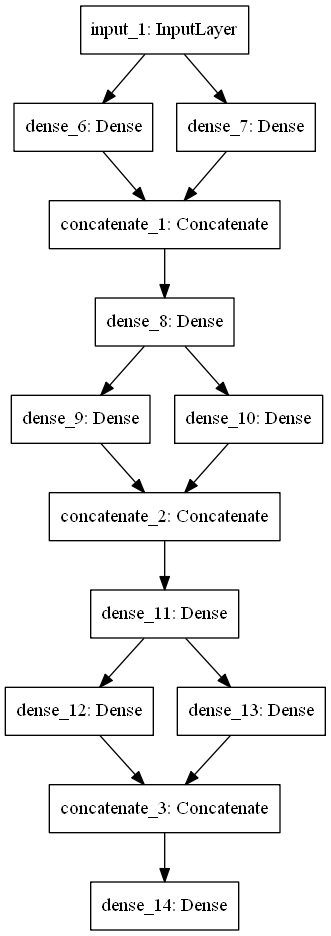

In [40]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import pydot
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')
from IPython.display import Image
Image(filename="model.png")

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer = Adam(lr = 0.01), metrics = ['acc'])
model_result = model.fit(x_train_normalization, y_train, batch_size = 100, epochs = 20, verbose = 1, validation_data = (x_test_normalization, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0715 - acc: 0.9761 - val_loss: 0.0304 - val_acc: 0.9910
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0271 - acc: 0.9914 - val_loss: 0.0227 - val_acc: 0.9930
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.0214 - acc: 0.9934 - val_loss: 0.0237 - val_acc: 0.9928
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0194 - acc: 0.9940 - val_loss: 0.0194 - val_acc: 0.9939
Epoch 5/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0178 - acc: 0.9946 - val_loss: 0.0215 - val_acc: 0.9940
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0217 - val_acc: 0.9933
Epoch 7/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.0154 - acc: 0.9954 - val_loss: 0.0224 - val_acc

In [26]:
score = model.evaluate(x_test_normalization, y_test)
print('model loss',score[0])
print('model 正確率',score[1] * 100 ,'%')

10000/10000 [==============================] - 0s 37us/step
model loss 0.021612104093818925
model 正確率 99.4009997177124 %


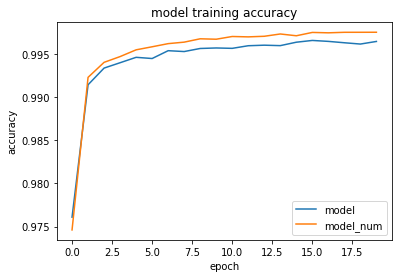

In [27]:
plt.plot(model_result.history['acc'])
plt.plot(model_num_result.history['acc'])

plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model','model_num'],loc = 'best')
plt.show()

In [28]:
model_json = model.to_json()
open('[NCTS]_Homework_Q8-1_Functional_API_DavidChi.json', 'w').write(model_json)
model.save_weights('[NCTS]_Homework_Q8-1_Functional_API_DavidChi.h5')